# House Prices - Regression
<img src="https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png" style="height: 100px;"/>

This notebook uses the House prices Dataset from Kaggle : [House prices - Advanced regression techniques](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)

After performing an Exploratory Data Analysis EDA, we will predict sale prices with 
- two regression models (simple and with a DNN) using Tensorflow
- a blended model

# I. Exploratory Data Analysis

##  1. Getting data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing

After importing the train and test datasets, we merge the two files and create a target variable with SalePrice.
The train and test will be recreated later in the project

In [2]:
df_train_ini=pd.read_csv('train.csv')
target = df_train_ini.SalePrice
df_test_ini = pd.read_csv('test.csv')
df_ini =pd.concat([df_train_ini,df_test_ini])
df_ini.drop(columns='SalePrice',inplace=True)

In [3]:
df_ini.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1460.000000,842.787043,1.0,730.5,1460.0,2189.5,2919.0
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0


## 2. Assessing data

### Assessing numerical data

In [4]:
df_num = df_ini.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']) #filter the numerical types
df_num=df_num.drop(columns='Id',axis=1)
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,548.0,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,460.0,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,608.0,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,642.0,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,836.0,192,84,0,0,0,0,0,12,2008


In [5]:
df_num.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0
BsmtFinSF2,2918.0,49.582248,169.205611,0.0,0.0,0.0,0.0,1526.0


All numerical variables are positive. 
The following variables are years or month : 
 - YearBuilt
 - YearRemodAdd
 - GarageYrBlt
 - YrSold
 - MoSold
We will look later if we need to switch them to categorical variables and create buckets



#### Check is there are NA values
We print only the columns with N/A

In [6]:
nullseries =df_num.isna().sum()
print (nullseries[nullseries >0])


LotFrontage     486
MasVnrArea       23
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt     159
GarageCars        1
GarageArea        1
dtype: int64


If we look at the description of these columns, we can find  : 
- LotFrontage: Linear feet of street connected to property
- MasVnrArea: Masonry veneer area in square feet
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- GarageYrBlt: Year garage was built
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet

Fill wth the mean of the variable calculated on the training dataset to avoid any biais:
- LotFrontage

Fill with zero :

- MasVnrArea
- BsmtFinSF1
- BsmtFinSF2
- BsmtUnfSF
- BsmtFullBath
- BsmtHalfBath
- GarageCars
- GarageArea

Fill with None : 
- GarageYrBlt: Year garage was built


#### Visual assessment of the numerical features

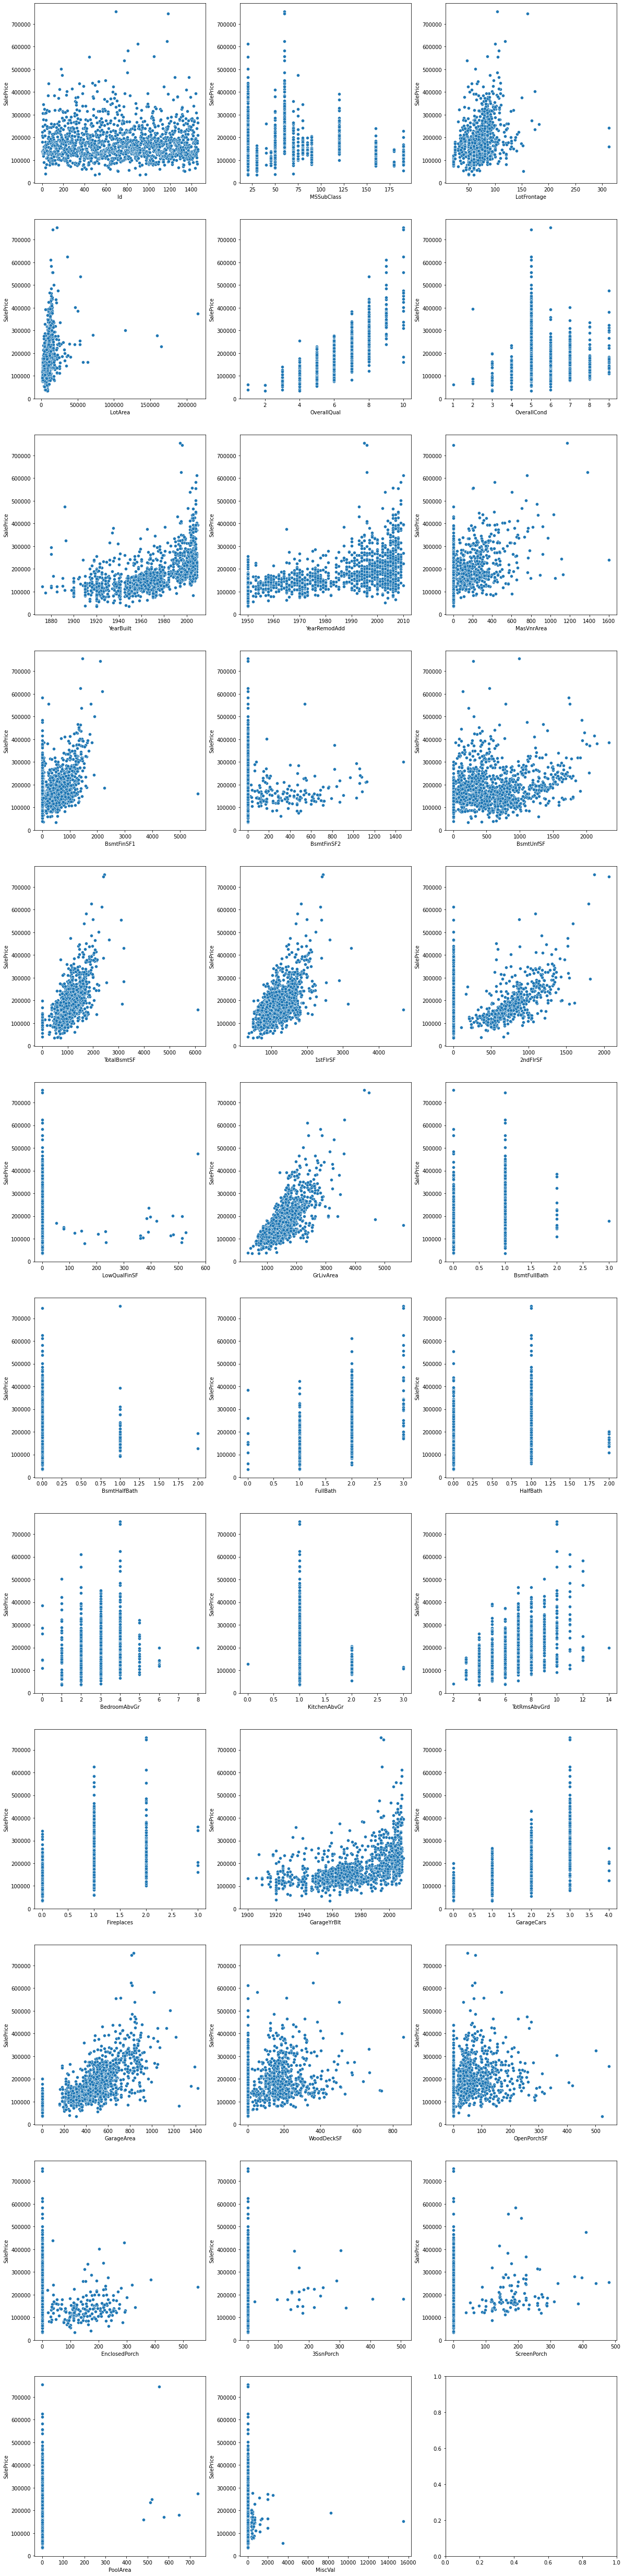

In [7]:
df_num_visual = df_train_ini.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
plot , ax = plt.subplots(math.floor(df_num_visual.shape[1]/3),3 , figsize = (20 , 90))
for index in range(df_num.shape[1]-1):
    sns.scatterplot(data = df_num_visual , y = "SalePrice" , x = df_num_visual.columns[index] , ax = ax[math.floor(index/3)][index%3])
plt.show()

- We will remove outliers, based on a visual assessment for the following variables; Their distribution will not allow us to use Z score or IQR without removing added values.
  - LotFrontage
  - LotArea
  - BsmtFinSF1
  - TotalBsmtSF
  - EnclosedPorch
  - MiscVal
- The following variables will be switch to categorical variables :
  - MsSubClass(Identifies the type of dwelling involved in the sale.)
  - MoSold (Month Sold)
- We will create buckets to switch these variables to categorical type: 
  - YearBuilt
  - YearRemodAdd
  - GarageYrBlt
  - YrSold (Year Sold)

 

### Assessing categorical Features


In [8]:
df_cat = df_ini.select_dtypes(include=['object']) #we keep only the object type
print(df_cat.columns)
df_cat.head().transpose()

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


,0,1,2,3,4
MSZoning,RL,RL,RL,RL,RL
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub
LotConfig,Inside,FR2,Inside,Corner,FR2
LandSlope,Gtl,Gtl,Gtl,Gtl,Gtl
Neighborhood,CollgCr,Veenker,CollgCr,Crawfor,NoRidge
Condition1,Norm,Feedr,Norm,Norm,Norm


#### Check is there are NA values

In [9]:
nullseries =df_cat.isna().sum()
print (nullseries[nullseries >0])
columns_cat_toNone = (nullseries[nullseries >0]).index

MSZoning           4
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinType2      80
Electrical         1
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageFinish     159
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64


All the missing values will be filled with 'None'

#### Check if some feature can be one-hot encoded

We look for categorical variables with only 2 unique values.

In [10]:
only2_cat_series =df_cat.apply(lambda col: len(col.unique()))
print (only2_cat_series[only2_cat_series<3])

Street        2
CentralAir    2
dtype: int64


The following variables will be transformed in a True/False variable ;
- Street
- CentralAir 

The remaining variables will be transformed in catogerical variable.

### Assessing Sale Price (target)
Let's have a look at the sale price variable, our target

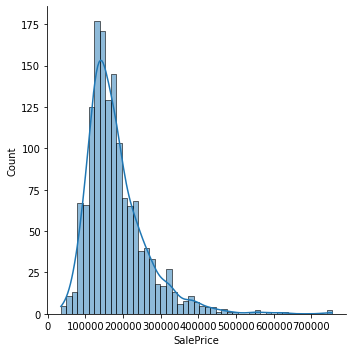

In [11]:
sns.displot(data=target, kde=True)

Our target does not seem to have a normal distribution. To be sure, we can calculate its kurtosis

In [12]:
target_skew = target.skew()
target_kurtosis =target.kurtosis()

print ('SalePrice skew is %.2f and its kurtosis %.2f'% (target_skew,target_kurtosis))

SalePrice skew is 1.88 and its kurtosis 6.54


With a kurtosis larger than 1, the distribution is too peaked.
With a Skewness larger than 1, the distribution is substantially skewed.

=> Applying a log tranformation will improve the distribution of our target.

# Data Cleansing

As a reminder, we will : 
- Target variable : 
    - Apply a log transformation to our target (SalePrice)

- Numerical features :
    - Fix N/A values :
        - Fill wth the mean of the variable calculated on the training dataset to avoid any biais :
            - LotFrontage
        - Fill with zero :
            - MasVnrArea
            - BsmtFinSF1
            - BsmtFinSF2
            - BsmtUnfSF
            - BsmtFullBath
            - BsmtHalfBath
            - GarageCars
            - GarageArea
        - Fill with 1900 : 
            - GarageYrBlt: Year garage was built
    - Switch to categorical variables for :
        - MsSubClass
        - MoSold 
    - Switch these variables to categorical by creating buckets: 
        - YearBuilt
        - YearRemodAdd
        - GarageYrBlt
        - YrSold
   - Remove outiers for :
        - LotFrontage
        - LotArea
        - BsmtFinSF1
        - TotalBsmtSF
        - EnclosedPorch
        - MiscVal
 - Categorical variables : 
    - Fill N/A values with None
    - the variables will be one-hot encoded 
        - Street
        - CentralAir
    - All others categorical features will be encoded

## 1. Target - SalePrice
We apply a log transformation and check that the distribution is nearly normal

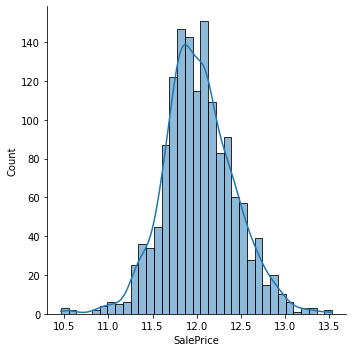

In [13]:
target_log= np.log(target)
sns.displot(data=target_log, kde=True)

## 2. Remove N/A values

In [14]:
#LotFrontage : Replace N/A by the mean
df_ini.LotFrontage.fillna(df_train_ini.LotFrontage.mean(),inplace=True)
columns_na_toZero = ['MasVnrArea','TotalBsmtSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','BsmtFullBath','BsmtHalfBath','GarageCars','GarageArea']
df_ini[columns_na_toZero]=df_ini[columns_na_toZero].fillna(0)
df_ini.GarageYrBlt=df_ini.GarageYrBlt.fillna(1900)
# we remove N/A for categorical variables and replace them by "None"
df_ini[columns_cat_toNone]=df_ini[columns_cat_toNone].fillna('None')
df_ini.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,12,2008,WD,Normal


In [15]:
columns_cat_toNone

Index(['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType'],
      dtype='object')

## 3. Switch to categorical variables for : MsSubClass, MoSold

In [16]:
df_ini.MSSubClass=df_ini.MSSubClass.astype(str)
df_ini.MoSold=df_ini.MoSold.astype(str)

## 4. Switch YearBuilt, YearRemodAdd, GarageYrBlt, YearSold to categorical type 

We will use a K-Means algorithms to create clusters

In [17]:

def apply_kmeans (data_series,num_cluster):
    data_array = data_series.to_numpy().reshape(-1, 1)
    result_kmean= KMeans(n_clusters=num_cluster, random_state=0).fit(data_array)
    return result_kmean.labels_

df_ini.YearBuilt = apply_kmeans(df_ini.YearBuilt,num_cluster=7)
df_ini.YearRemodAdd = apply_kmeans(df_ini.YearRemodAdd,num_cluster=7)
df_ini.GarageYrBlt = apply_kmeans(df_ini.GarageYrBlt,num_cluster=5)
df_ini.YrSold = apply_kmeans(df_ini.YrSold,num_cluster=5)


One-Hot encoding of 
    - Street
    - CentralAir

In [18]:
df_ini.Street=pd.get_dummies(df_ini.Street,drop_first=True)
df_ini.CentralAir=pd.get_dummies(df_ini.CentralAir,drop_first=True)


## 5. Categorical values encoding

In [19]:
# we get the list of the variables to transform.
cat_columns= np.setdiff1d(df_ini.select_dtypes(include=['object']).columns,['Street','CentralAir'])

In [20]:

le = preprocessing.LabelEncoder()
for col in cat_columns:
    df_ini[col]=le.fit_transform(df_ini[col])


In [21]:
df_ini.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   int64  
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   uint8  
 6   Alley          2919 non-null   int64  
 7   LotShape       2919 non-null   int64  
 8   LandContour    2919 non-null   int64  
 9   Utilities      2919 non-null   int64  
 10  LotConfig      2919 non-null   int64  
 11  LandSlope      2919 non-null   int64  
 12  Neighborhood   2919 non-null   int64  
 13  Condition1     2919 non-null   int64  
 14  Condition2     2919 non-null   int64  
 15  BldgType       2919 non-null   int64  
 16  HouseStyle     2919 non-null   int64  
 17  OverallQual    2919 non-null   int64  
 18  OverallC

We recreate train and test datasets

## 6. Remove of the outiers from the train dataset

In [22]:
df_train = pd.merge(df_ini,df_train_ini.Id, on='Id')
df_train['target'] = target_log
df_test = pd.merge(df_ini,df_test_ini.Id, on='Id')

In [23]:
df_train.shape

(1460, 81)

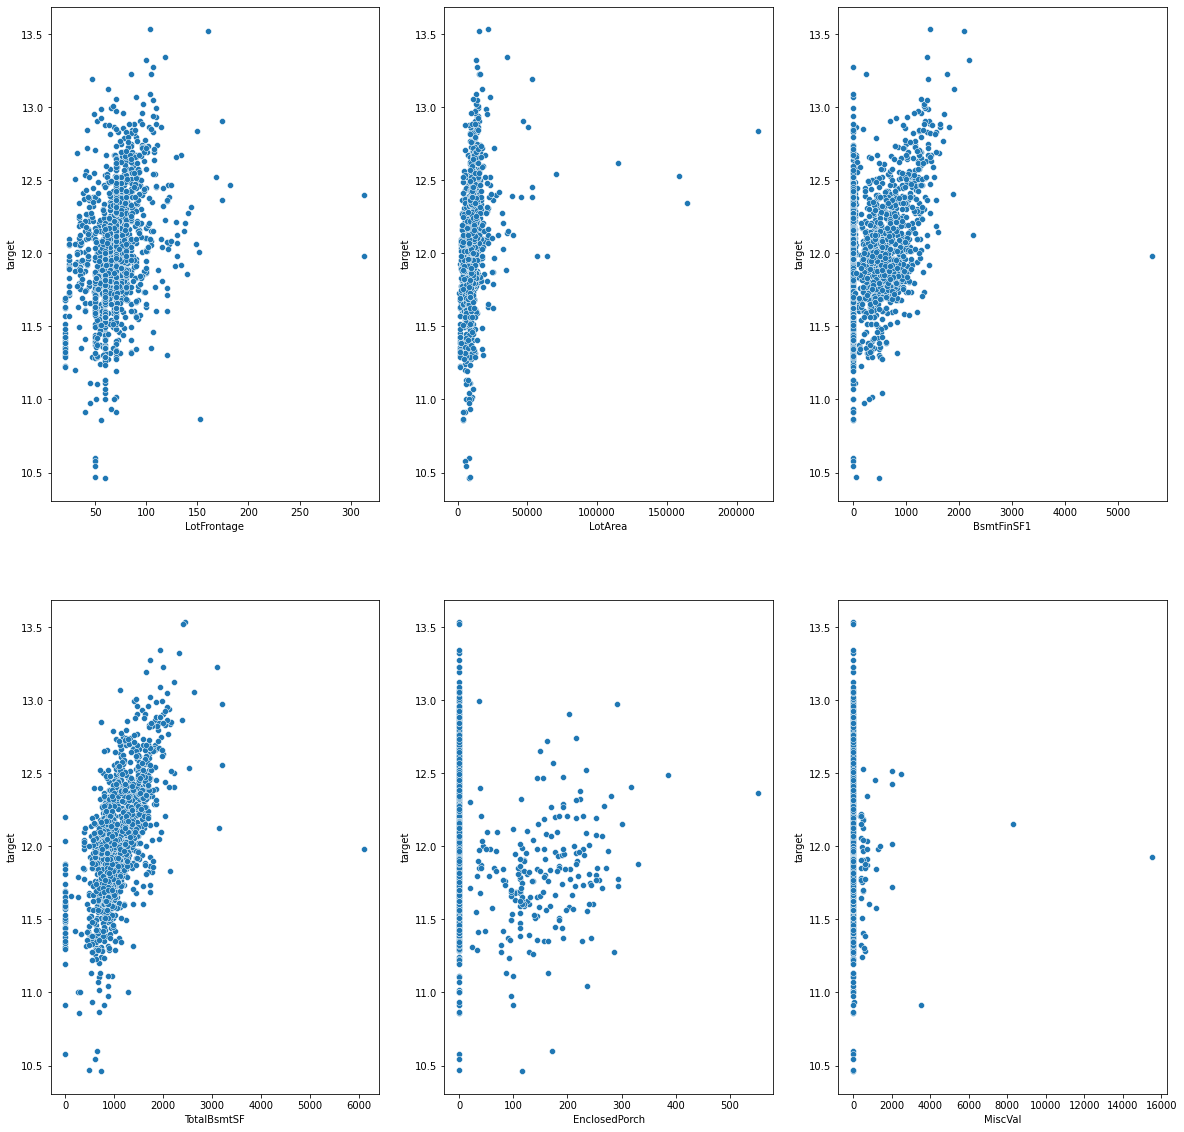

In [24]:
columns_outliers = ['LotFrontage','LotArea','BsmtFinSF1','TotalBsmtSF','EnclosedPorch','MiscVal']
plot , ax = plt.subplots(2,3 , figsize = (20 , 20))
for index,co in enumerate(columns_outliers):
    sns.scatterplot(data = df_train, y = "target" , x =co , ax = ax[math.floor(index/3)][index%3])
plt.show()

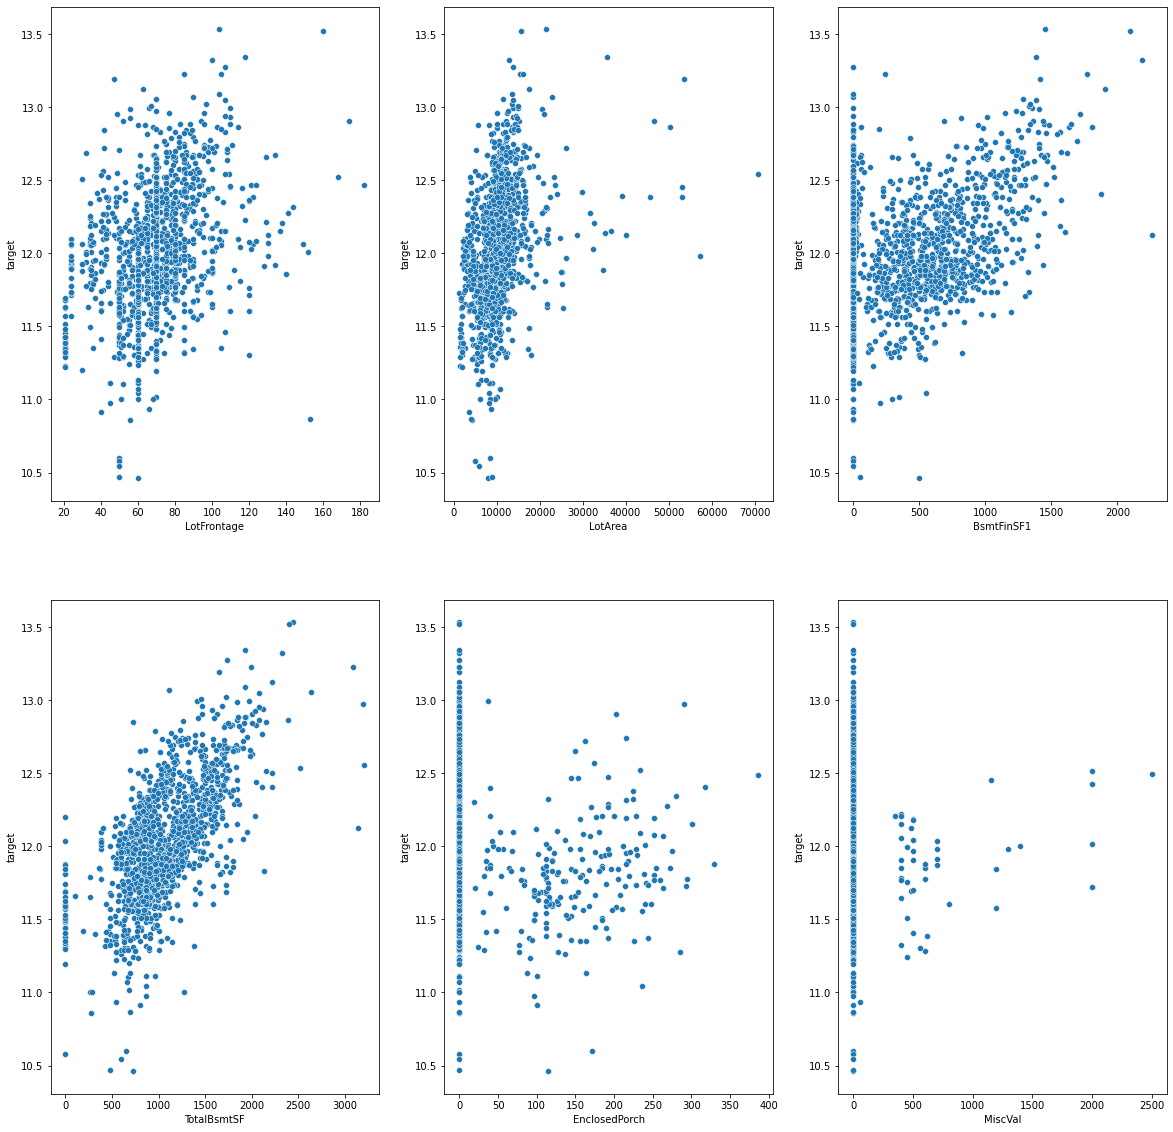

In [25]:
#we remove the outliers and check visually
df_train = df_train[(df_train['LotFrontage']<250) & (df_train['LotArea']<100000) & (df_train['BsmtFinSF1']<4000) &(df_train['TotalBsmtSF']<4000)&(df_train['EnclosedPorch']<400)&(df_train['MiscVal']<3000)  ]
plot , ax = plt.subplots(2,3 , figsize = (20 , 20))
for index,co in enumerate(columns_outliers):
    sns.scatterplot(data = df_train, y = "target" , x =co , ax = ax[math.floor(index/3)][index%3])
plt.show()

# II. Training

In [26]:
#X, y will be our input for our models. We remove 'Id' as it is just an index and may create a biais
from sklearn.model_selection import train_test_split
X= np.array(df_train.drop(columns=['Id','target']))
y= np.array(df_train.target)

## 2. Basic regression with tensorflow

In [27]:
import tensorflow as tf
tf.config.set_visible_devices([], 'GPU')
from tensorflow.keras import layers
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"    #CPU only as it will be faster without GPU with these models


In [28]:
# we set an earling stopping function to avoid basic overfitting

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    verbose=1,
    patience=10, 
    mode='min',
    restore_best_weights=True)

#Reducing the learning rate will allow to start with a large learning rate and reduce it to help the model to learn
rlrop = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', mode='min', patience= 5, factor= 0.5, min_lr= 1e-6, verbose=0)


In [29]:
basicreg_model = tf.keras.Sequential([layers.Normalization(input_shape=[X.shape[1],], axis=1),
layers.Dense(units=1)
])

basicreg_model.summary()
basicreg_model.compile(optimizer=tf.optimizers.Adam(learning_rate = 1e-1),loss='MeanSquaredError',metrics=[tf.keras.metrics.RootMeanSquaredError("RMSE")])
history = basicreg_model.fit(X,y,validation_split=0.2,epochs=500,verbose=0,callbacks=[rlrop,early_stopping])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 79)                159       
_________________________________________________________________
dense (Dense)                (None, 1)                 80        
Total params: 239
Trainable params: 80
Non-trainable params: 159
_________________________________________________________________


2023-01-10 11:39:10.562803: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Restoring model weights from the end of the best epoch.
Epoch 00077: early stopping


Basic regression model using Tensorflow : 0.9100)


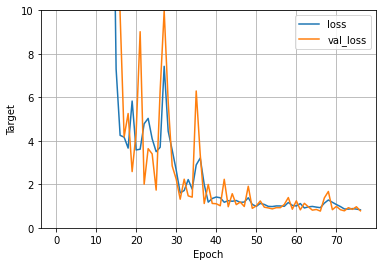

In [30]:
def plot_loss(history): #function to plot the loss.
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Target')
  plt.legend()
  plt.grid(True)

rmse =np.sqrt(np.min(history.history['loss']))
print("Basic regression model using Tensorflow : {:.4f})".format(rmse))
plot_loss(history)


## 3. Basic regression with DNN

In [31]:

basicreg_dnn_model = tf.keras.Sequential([layers.Normalization(input_shape=[X.shape[1],], axis=1),  
    layers.Dense(units=10),
    layers.Dense(units=1)
])

basicreg_dnn_model.summary()
basicreg_dnn_model.compile(optimizer=tf.optimizers.Adam(learning_rate = 1e-1),loss='MeanSquaredError',metrics=[tf.keras.metrics.RootMeanSquaredError("RMSE")])
history_dnn = basicreg_dnn_model.fit(X,y,validation_split=0.2,epochs=500,verbose=1,callbacks=[rlrop,early_stopping])


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 79)                159       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                800       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 970
Trainable params: 811
Non-trainable params: 159
_________________________________________________________________
Epoch 1/500
37/37 [==============================] - 0s 2ms/step - loss: 2438518.5000 - RMSE: 1561.5757 - val_loss: 13035.8291 - val_RMSE: 114.1746
Epoch 2/500
37/37 [==============================] - 0s 860us/step - loss: 24533.0840 - RMSE: 156.6304 - val_loss: 990.9110 - val_RMSE: 31.4787
Epoch 3/500
37/37 [==============================] - 0s 775us/step - loss: 636.7693 - RMSE: 

DNN model  using tensorflow: 0.5973)


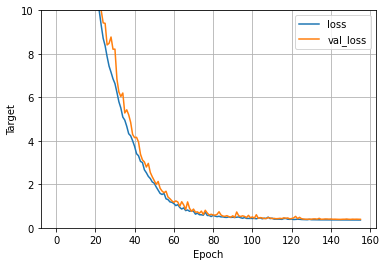

In [32]:
rmse =np.sqrt(np.min(history_dnn.history['loss']))
print("DNN model  using tensorflow: {:.4f})".format(rmse))
plot_loss(history_dnn)

## 4. Blended model

The blended model will be composed by : 
- Tree regressor
- Random forest regressor
- XGBoost tree regressor
- Ridge regressor
- SVM
- Light gradient boost tree

In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline

kf = KFold(n_splits=12, random_state=42, shuffle=True)

def root_mse (y,y_pred): #will be used to calculate the root mean squared error of the blended model
    return mean_squared_error(y,y_pred,squared=False) 
def cv_rootmse(model,X,y): #calculate rootMSE using cross validation.
    mse = -cross_val_score(estimator=model,X=X, y=y, scoring="neg_mean_squared_error", cv=kf) #we use negative MSE because of GridSearchCV which tries to maximize the loss.)
    return np.sqrt(mse)
scores = {} #all the models scores
models ={} #all the models

### Basic tree regressor

In [34]:
simplemodel = DecisionTreeRegressor(random_state=0)
score =cv_rootmse(simplemodel,X,y)
print("Basic Decision Tree Model: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Basic Decision Tree Model: 0.2025 (0.0243)


#### Tree regressor optimization

In [35]:
#Gridsearch will help us to find the best hyperparameters
clf = GridSearchCV(simplemodel , {
    "max_depth" : [6,7,8,9,10,11,12],
    "min_samples_split": [6,7,8,9,10],
    "min_samples_leaf" : [5,7,8,9,10]
},verbose = 1)
clf.fit(X ,y)

simplemodel=clf.best_estimator_
score = cv_rootmse(simplemodel,X,y)
scores['BasicTree'] = score.mean()
models['BasicTree'] = simplemodel
print("Optimized Decision Tree Model: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Fitting 5 folds for each of 175 candidates, totalling 875 fits
Optimized Decision Tree Model: 0.1820 (0.0200)


### Random forest regressor

In [36]:
random_forest_model = RandomForestRegressor(random_state=42)
score =cv_rootmse(random_forest_model,X,y)
print("Random Forest Model: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['RandomForest'] = score.mean()
models['RandomForest'] = random_forest_model

Random Forest Model: 0.1372 (0.0214)


### XGboost regressor

In [37]:
xgboostmodel = XGBRegressor(objective='reg:squarederror',random_state=42)
score=cv_rootmse(xgboostmodel,X,y)
print("XGBoost Model: {:.4f} ({:.4f})".format(score.mean(), score.std()))


XGBoost Model: 0.1388 (0.0205)


In [38]:
param_tuning = {
        'learning_rate': [0.01,0.05, 0.1],
        'max_depth': [5,6], #Maximum depth of a tree. default 6
        'min_child_weight': [3, 5,7], #Minimum sum of instance weight (hessian) needed in a child. Larger = more conservative
        'n_estimators' : [300,400, 500], #Number of gradient boosted trees.
        'objective': ['reg:squarederror']
    }
gsearch = GridSearchCV(estimator = xgboostmodel,
                           param_grid = param_tuning,                        
                           cv = kf,
                           n_jobs = -1,
                           verbose = 1)

gsearch.fit(X,y)

Fitting 12 folds for each of 54 candidates, totalling 648 fits


GridSearchCV(cv=KFold(n_splits=12, random_state=42, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    int...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [5, 6], 'min_child_weight': [3, 5, 7],
                         'n_estimators': [300, 400, 500],
                         'objective': ['reg:squarederror']},
             verbose=1)

In [39]:
score=cv_rootmse(gsearch.best_estimator_,X,y)
print("XGBoost Model with optimimzation: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['XGBoost'] = score.mean()
models['XGBoost'] = gsearch.best_estimator_

XGBoost Model with optimimzation: 0.1227 (0.0171)


### Ridge regressor (L2 regularization)
Good performance when data have multicollinarity

In [40]:
Ridge = Pipeline(steps=[("scaler",RobustScaler()), ("ridge",Ridge())])
param = {
    'ridge__alpha':[.0001, 0.001,0.01, 0.01],
    'ridge__fit_intercept':[True,False],
'ridge__solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
       }
clf = GridSearchCV(Ridge, param,  n_jobs=-1, cv=kf)
clf.fit(X,y)
score = cv_rootmse(clf.best_estimator_,X,y)
scores['Ridge'] = score.mean()
models['Ridge'] = clf.best_estimator_
print("RidgeRegressor Model: {:.4f} ({:.4f})".format(score.mean(), score.std()))

RidgeRegressor Model: 0.1332 (0.0253)


### SVM - Support Vector Machine

In [41]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline

svr_model = Pipeline(steps=[("scaler",RobustScaler()), ("SVR",SVR())])
score =cv_rootmse(svr_model,X,y)
print("SVM Model without optmization: {:.4f} ({:.4f})".format(score.mean(), score.std()))

SVM Model without optmization: 0.3063 (0.0188)


In [42]:
parameters = {'SVR__C':np.arange(20,30,1),'SVR__gamma':np.arange(0.0001,0.0005,0.0001),'SVR__epsilon':np.arange(0.0010,0.0015,0.0001)}
clf =GridSearchCV(svr_model, parameters,n_jobs=-1,cv=kf,verbose=1)
clf.fit(X,y)
clf.best_params_
score = cv_rootmse(clf.best_estimator_,X,y)
scores['SVM'] = score.mean()
models['SVM'] = clf.best_estimator_
print("SVM Model with optimization: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Fitting 12 folds for each of 200 candidates, totalling 2400 fits
SVM Model with optimization: 0.1912 (0.0323)


### Light Gradient Boosting regressor 

In [43]:
lightgbm_model = LGBMRegressor(objective='regression', verbose=1,random_state=42)
score= score =cv_rootmse(lightgbm_model,X,y)
print("LGBM Model: {:.4f} ({:.4f})".format(score.mean(), score.std()))
scores['LGBM'] = score.mean()
models['LGBM'] = lightgbm_model

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004152 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3068
[LightGBM] [Info] Number of data points in the train set: 1329, number of used features: 74
[LightGBM] [Info] Start training from score 12.028860
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001866 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3074
[LightGBM] [Info] Number of data points in the train set: 1329, number of used features: 74
[LightGBM] [Info] Start training from score 12.030714
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001793 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3069
[LightGBM] [Info] Number of data points in the 

After defining the different models and tweaks some of their parameters, we train them on the whole dataset (no more validation data).
The goal is to have better trained model when moving to the prediction phase.

In [44]:
models_full ={}
for index,(label,model) in enumerate(models.items()):
    models_full[label] = model.fit(X,y)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003542 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3135
[LightGBM] [Info] Number of data points in the train set: 1450, number of used features: 74
[LightGBM] [Info] Start training from score 12.022788


### Blended model

We create a blended model to maximaze prediction performance and prevent overfitting

In [63]:
def blended_predict(X,models_full,weight_type='equi',scores=None):
    b_y=0
    if weight_type=='equi':
        weight = 1/len(models_full)
        for  index,(label,model) in enumerate(models_full.items()):
            b_y+=weight*model.predict(X)
    if weight_type=='score_weigthed':
        scores_list =[ 1 - i for i in list(scores.values())]
        weight =[i / np.sum(scores_list) for i in scores_list]
        for  index,(label,model) in enumerate(models_full.items()):
            b_y+=weight[index]*model.predict(X)
    if weight_type=='custom':
        w=[0.1, 0.2, 0.2, 0.2, 0.1,0.2]
        for  index,(label,model) in enumerate(models_full.items()):
            b_y+=w[index]*model.predict(X)
    return b_y


y_pred = blended_predict(X,models_full,'custom',scores)
score = root_mse(y,y_pred)
print("Blended Model with score weighted: {:.4f}".format(score.mean()))

Blended Model with score weighted: 0.0651


# III. Prediction on the test dataset

In [46]:
X_test= np.array(df_test.drop(columns=['Id'])) #we remove the column id to have the same shape as used during the training

## Basic regression with tensorflow

,SalePrice
count,1459
mean,220406
std,281147
min,2126
25%,78242
50%,142281
75%,258888
max,3307358


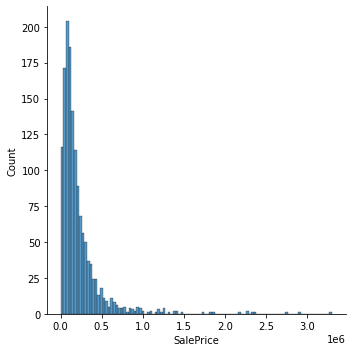

In [66]:
y_pred_test_basicreg = basicreg_model.predict(X_test)
y_pred_final_basicreg = np.floor(np.expm1(y_pred_test_basicreg))
sns.displot(pd.DataFrame(y_pred_final_basicreg,columns=['SalePrice']),x='SalePrice')
pd.DataFrame(y_pred_final_basicreg,columns=['SalePrice']).describe().apply(lambda s: s.apply('{0:.0f}'.format))

,SalePrice
count,1459
mean,202330
std,185206
min,7008
25%,95978
50%,154804
75%,238339
max,1984852


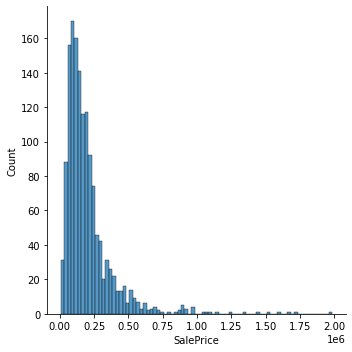

In [65]:
y_pred_test_reg_dnn = basicreg_dnn_model.predict(X_test)
y_pred_final_reg_dnn = np.floor(np.expm1(y_pred_test_reg_dnn))
sns.displot(pd.DataFrame(y_pred_final_reg_dnn,columns=['SalePrice']),x='SalePrice')
pd.DataFrame(y_pred_final_reg_dnn,columns=['SalePrice']).describe().apply(lambda s: s.apply('{0:.0f}'.format))

Basic regression and DNN models are not efficient. Standard deviation is high and visualization confirms it.

## Blended model

,SalePrice
count,1459
mean,177191
std,73318
min,52628
25%,128951
50%,156776
75%,206716
max,505817


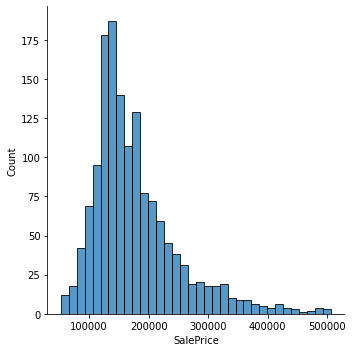

In [64]:
y_pred_test = blended_predict(X_test,models_full,'score_weigthed',scores)
y_pred_final = np.floor(np.expm1(y_pred_test))
sns.displot(pd.DataFrame(y_pred_final,columns=['SalePrice']),x='SalePrice')
pd.DataFrame(y_pred_final,columns=['SalePrice']).describe().apply(lambda s: s.apply('{0:.0f}'.format))

### Create a file for submission and be graded by Kaggle

In [50]:
final_csv= pd.read_csv('sample_submission.csv')
final_csv.iloc[:,1]= y_pred_final
final_csv.to_csv('submission.csv',index=False)